# Synthetic example to investigate whether multi-mission delta_h values must be relative to the same DEM

# Problem: 
i'm working on a project that involves combining two separate height change time series. each one has delta_h variable that is relative to a reference DEM. but each dataset uses a different reference DEM. i'm working with a derived variable, dh, found by differencing each time step using xarray .diff('time') dot method on the xarray datasets.

what i'm wondering if the the dh's in each datasets are comparable even though each is relative to a different DEM or if i should convert one of the datasets to be relative to the reference DEM of the other dataset?

In [3]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt


Dataset A (reference DEM: 900m)
delta_h: [100.   99.7  99.3  98.8  98.2  97.5  96.7  95.8  94.8  93.7]
dh: [ nan -0.3 -0.4 -0.5 -0.6 -0.7 -0.8 -0.9 -1.  -1.1]

Dataset B (reference DEM: 850m)
delta_h: [150.  149.7 149.3 148.8 148.2 147.5 146.7 145.8 144.8 143.7]
dh: [ nan -0.3 -0.4 -0.5 -0.6 -0.7 -0.8 -0.9 -1.  -1.1]


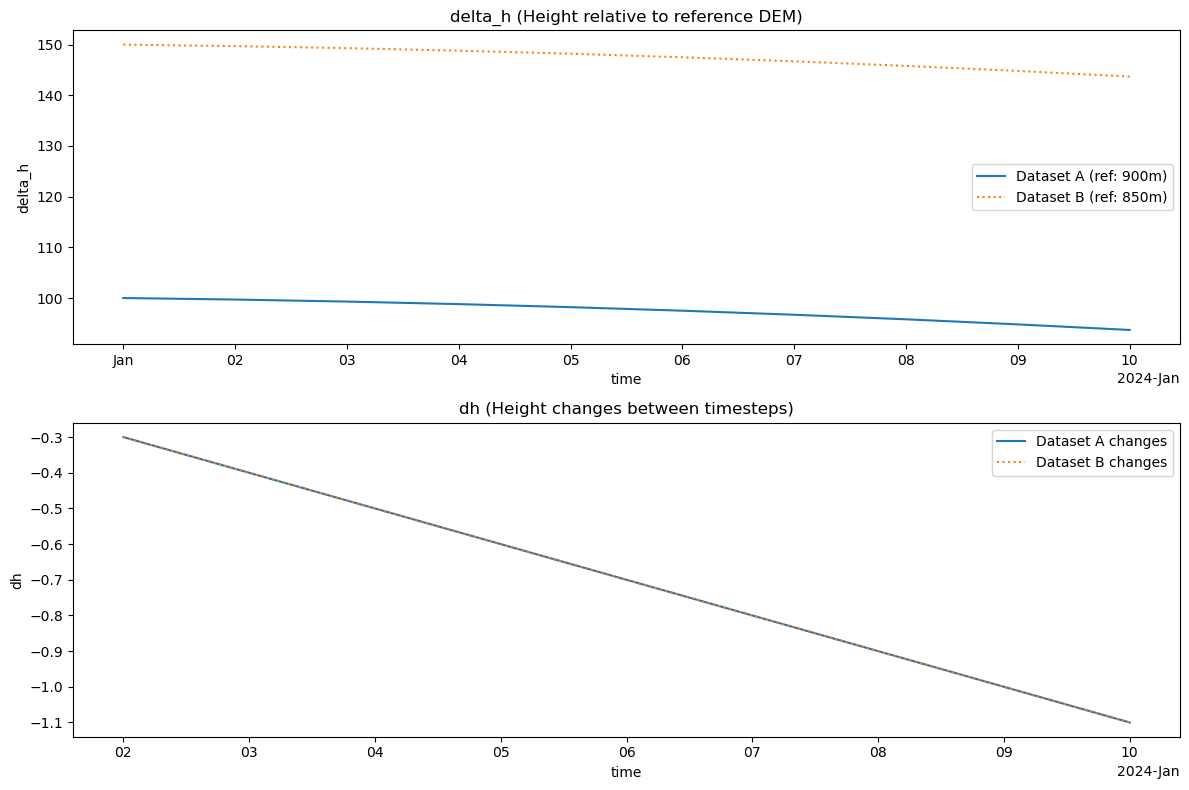

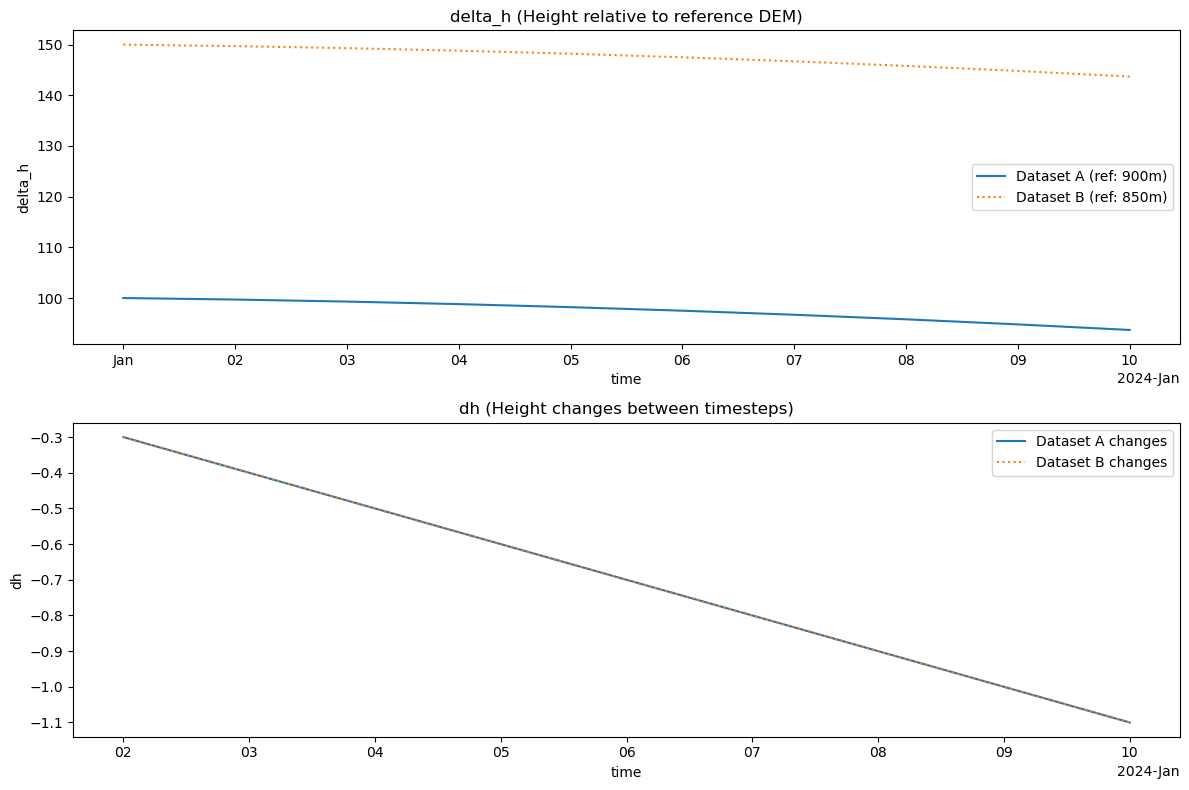

In [4]:
# Create time series data
times = pd.date_range('2024-01-01', '2024-01-10', freq='D')

# Let's imagine we're measuring the height of a melting glacier
# Create synthetic height measurements relative to two different reference DEMs

# True absolute heights (what's actually happening in reality)
true_heights = np.array([1000, 999.7, 999.3, 998.8, 998.2, 
                        997.5, 996.7, 995.8, 994.8, 993.7])

# Dataset 1: Referenced to DEM_A at 900m
reference_dem_A = 900
delta_h_A = true_heights - reference_dem_A

# Dataset 2: Referenced to DEM_B at 850m
reference_dem_B = 850
delta_h_B = true_heights - reference_dem_B

# Create xarray datasets
ds_A = xr.Dataset(
    data_vars={
        'delta_h': ('time', delta_h_A),
    },
    coords={
        'time': times
    }
)

ds_B = xr.Dataset(
    data_vars={
        'delta_h': ('time', delta_h_B),
    },
    coords={
        'time': times
    }
)

# Calculate dh (height changes) for both datasets
ds_A['dh'] = ds_A['delta_h'].diff('time')
ds_B['dh'] = ds_B['delta_h'].diff('time')

# Create a function to visualize our results
def plot_comparison():
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot delta_h values
    ds_A['delta_h'].plot(ax=ax1, label='Dataset A (ref: 900m)')
    ds_B['delta_h'].plot(ax=ax1, linestyle='dotted', label='Dataset B (ref: 850m)')
    ax1.set_title('delta_h (Height relative to reference DEM)')
    ax1.legend()
    
    # Plot dh values
    ds_A['dh'].plot(ax=ax2, label='Dataset A changes')
    ds_B['dh'].plot(ax=ax2, linestyle='dotted', label='Dataset B changes')
    ax2.set_title('dh (Height changes between timesteps)')
    ax2.legend()
    
    plt.tight_layout()
    return fig

# Print the values for comparison
print("\nDataset A (reference DEM: 900m)")
print("delta_h:", ds_A['delta_h'].values)
print("dh:", ds_A['dh'].values)

print("\nDataset B (reference DEM: 850m)")
print("delta_h:", ds_B['delta_h'].values)
print("dh:", ds_B['dh'].values)

# Plot the results
plot_comparison()